In [1]:
from cv2 import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from IPython.display import clear_output

In [2]:
def open_img(path):
    img_bgr2 = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
    return img_rgb

In [3]:
def show_img(img, colormode='gray'):
    dim = img.shape
    colormap = 'gray' if len(dim) < 3 else None
    colormode = 'L' if len(dim) < 3 else 'RGB'
    img = Image.fromarray(np.uint8(img), colormode)
    plt.imshow(img, colormap)
    plt.axis('off')
    plt.show()

IMAGE SHAPE (321, 326, 3)


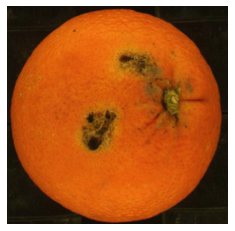

In [4]:
img = open_img('../test_imgs/orange_blasco.png')
print('IMAGE SHAPE', img.shape)
show_img(img)

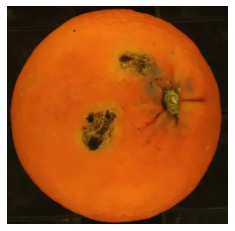

In [5]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 5, 5, 4, 10)
show_img(dst)

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [12]:
pixel_values = dst.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [13]:
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [14]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [15]:
segmented_image = centers[labels.flatten()]

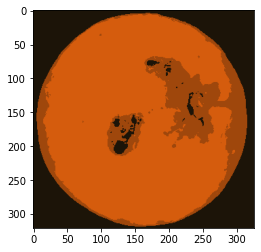

In [18]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(dst.shape)
# show the image
plt.imshow(segmented_image)
plt.show()